<img src="images/usm.jpg" width="480" height="240" align="left"/>

# MAT281 - Laboratorio N°03

## Objetivos del laboratorio

* Reforzar conceptos básicos de análisis no supervisado.

## Contenidos

* [Problema 01](#p1)


<a id='p1'></a>
## I.- Problema 01


<img src="https://freedesignfile.com/upload/2013/06/Car-logos-1.jpg" width="360" height="360" align="center"/>


El conjunto de datos se denomina `vehiculos_procesado_con_grupos.csv`, el cual contine algunas de las características más importante de un vehículo.

En este ejercicio se tiene como objetivo, es poder clasificar los distintos vehículos basados en las cracterísticas que se presentan a continuación. La dificultad de este ejercicio radíca en que ahora tenemos variables numéricas y variables categóricas.

Lo primero será cargar el conjunto de datos:

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.dummy import DummyClassifier
from sklearn.cluster import KMeans


%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
# cargar datos
df = pd.read_csv(os.path.join("data","vehiculos_procesado_con_grupos.csv"), sep=",")\
       .drop(
            ["fabricante", 
             "modelo",
             "transmision", 
             "traccion", 
             "clase", 
             "combustible",
             "consumo"], 
    
          axis=1)

df.head()

,year,desplazamiento,cilindros,co2,clase_tipo,traccion_tipo,transmision_tipo,combustible_tipo,tamano_motor_tipo,consumo_tipo,co2_tipo,consumo_litros_milla
0,1984,2.5,4.0,522.764706,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.222671
1,1984,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
2,1985,2.5,4.0,555.437500,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.236588
3,1985,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
4,1987,3.8,6.0,555.437500,Coches Medianos,dos,Automatica,Premium,grande,alto,alto,0.236588


En este caso, no solo se tienen datos numéricos, sino que también categóricos. Además, tenemos problemas de datos **vacíos (Nan)**. Así que para resolver este problema, seguiremos varios pasos:

## 1.- Normalizar datos

1. Cree un conjunto de datos con las variables numéricas, además, para cada dato vacía, rellene con el promedio asociado a esa columna. Finalmente, normalize los datos mediante el procesamiento **MinMaxScaler** de **sklearn**.

2.-  Cree un conjunto de datos con las variables categóricas , además, transforme de variables numéricas a categóricas ocupando el comando **get_dummies** de pandas ([refrenecia](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)). Explique a grande rasgo como se realiza la codificación de variables numéricas a categóricas.

3.- Junte ambos dataset en uno, llamado **df_procesado**. 


In [3]:
## Número 1
num_predictor_names = [] # variables continuas/numéricas
cat_predictor_names = [] # variables categóricas
for column in df.columns:
    if df[column].dtype == 'object': #si es que el tipo es objeto, entonces se añade a variables categóricas, sino, es numérica.
        cat_predictor_names.append(column) 
    else:
        num_predictor_names.append(column) 
print(num_predictor_names)
print(cat_predictor_names)
        

['year', 'desplazamiento', 'cilindros', 'co2', 'consumo_litros_milla']
['clase_tipo', 'traccion_tipo', 'transmision_tipo', 'combustible_tipo', 'tamano_motor_tipo', 'consumo_tipo', 'co2_tipo']


In [4]:
df_num=df.drop(cat_predictor_names,axis=1) #se dropean del dataframe original las variables categoricas, para que queden las continuas
df_num.head()

,year,desplazamiento,cilindros,co2,consumo_litros_milla
0,1984,2.5,4.0,522.764706,0.222671
1,1984,4.2,6.0,683.615385,0.291185
2,1985,2.5,4.0,555.437500,0.236588
3,1985,4.2,6.0,683.615385,0.291185
4,1987,3.8,6.0,555.437500,0.236588


In [5]:
for column in df_num.columns:
    if df_num[column].notnull().all() == False: 
        df_num = df_num.fillna(df_num[column].mean()) #si el notnull es falso, entoces es null, luego se rellena con el promedio

In [6]:
scaler=MinMaxScaler() #se utiliza el minmaxscaler
df_num[num_predictor_names] = scaler.fit_transform(df_num[num_predictor_names]) #se ajusta al dataframe de las variables numéricas

df_num.head()

,year,desplazamiento,cilindros,co2,consumo_litros_milla
0,0.000000,0.243590,0.142857,0.398014,0.331027
1,0.000000,0.461538,0.285714,0.527672,0.475113
2,0.029412,0.243590,0.142857,0.424351,0.360294
3,0.029412,0.461538,0.285714,0.527672,0.475113
4,0.088235,0.410256,0.285714,0.424351,0.360294


In [7]:
## Pregunta 2

df_cat=df.drop(num_predictor_names,axis=1) #se dropean del dataframe original las variables continuas, para que queden las categoricas
df_cat.head()

,clase_tipo,traccion_tipo,transmision_tipo,combustible_tipo,tamano_motor_tipo,consumo_tipo,co2_tipo
0,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto
1,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto
2,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto
3,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto
4,Coches Medianos,dos,Automatica,Premium,grande,alto,alto


In [8]:
df_cat_dummies= pd.get_dummies(df_cat) #se obtiene el dataframe con los dummies
df_cat_dummies.head()

,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,clase_tipo_Deportivos,clase_tipo_Furgoneta,clase_tipo_Vehículos Especiales,traccion_tipo_cuatro,traccion_tipo_dos,...,consumo_tipo_alto,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo
0,0,0,0,0,0,0,0,1,0,1,...,1,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,1,...,1,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,1,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0


La función **get_dummies** lo que hace es convertir las variables categóricas en numéricas contando las distintas características que posee cada objeto, y creando un vector de ceros y unos binariamente, es decir, si posee o no posee la característica.

In [9]:
## Pregunta 3

df_procesado= df_num.join(df_cat_dummies) #acá se unen con join
df_procesado.head()

,year,desplazamiento,cilindros,co2,consumo_litros_milla,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,...,consumo_tipo_alto,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo
0,0.000000,0.243590,0.142857,0.398014,0.331027,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,0.000000,0.461538,0.285714,0.527672,0.475113,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0.029412,0.243590,0.142857,0.424351,0.360294,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,0.029412,0.461538,0.285714,0.527672,0.475113,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0.088235,0.410256,0.285714,0.424351,0.360294,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0


In [10]:
df_procesado.describe()

,year,desplazamiento,cilindros,co2,consumo_litros_milla,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,...,consumo_tipo_alto,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo
count,36791.000000,36791.000000,36791.000000,36791.000000,36791.000000,36791.000000,36791.000000,36791.000000,36791.000000,36791.000000,...,36791.000000,36791.000000,36791.000000,36791.000000,36791.000000,36791.000000,36791.000000,36791.000000,36791.000000,36791.000000
mean,0.493748,0.348947,0.267593,0.358049,0.285734,0.147835,0.068848,0.049931,0.115816,0.353538,...,0.130141,0.203528,0.274007,0.184284,0.208040,0.129434,0.200593,0.275013,0.194395,0.200565
std,0.305137,0.174347,0.125577,0.095790,0.106183,0.354941,0.253200,0.217805,0.320009,0.478074,...,0.336463,0.402627,0.446019,0.387721,0.405911,0.335684,0.400449,0.446527,0.395740,0.400429
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.205882,0.205128,0.142857,0.288086,0.208866,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.529412,0.307692,0.285714,0.352257,0.281734,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.764706,0.474359,0.285714,0.424351,0.331027,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 2.- Realizar ajuste mediante kmeans

Una vez depurado el conjunto de datos, es momento de aplicar el algoritmo de **kmeans**.

1. Ajuste el modelo de **kmeans** sobre el conjunto de datos, con un total de 8 clusters.
2. Calcular los cluster y el valor de los centroides.
3. Realizar que resumas las principales cualidades de cada cluster. Para  cada cluster calcule:

    a. Valor promedio de las variables numérica.\
    b. Moda para las variables numericas
    
    

In [11]:
# Número 1
from sklearn.cluster import KMeans

kmeans = KMeans()
kmeans.fit(df_procesado) #se fittea el kmeans
centroids = kmeans.cluster_centers_ # centros 
clusters = kmeans.labels_ # clusters

In [12]:
#se etiquetan los datos con los clusters
centroids_df_proc = pd.DataFrame(centroids, columns=df_procesado.columns)
centroids_df_proc["cluster"] = [1,2,3,4,5,6,7,8]

df_procesado["cluster"] = clusters
df_procesado["cluster"] = df_procesado["cluster"].astype('category')
centroids_df_proc.head()


,year,desplazamiento,cilindros,co2,consumo_litros_milla,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,...,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo,cluster
0,0.478459,0.451028,0.327460,0.410095,0.343319,3.051173e-01,0.017058,0.041365,0.048401,0.150533,...,-1.421085e-14,4.051173e-02,8.528785e-04,-6.578071e-15,9.923241e-01,7.494005e-16,0.000640,7.036247e-03,-1.770806e-14,1
1,0.695376,0.179181,0.150590,0.240126,0.156766,1.132427e-14,0.110332,0.027778,0.181464,0.546469,...,-1.265654e-14,2.596054e-04,1.323941e-14,9.997404e-01,1.063039e-14,1.609553e-02,0.000519,-9.353629e-15,9.833853e-01,2
2,0.408904,0.331590,0.256904,0.354298,0.282153,1.807110e-01,0.083772,0.090685,0.133147,0.184167,...,1.382488e-02,9.807439e-01,1.645820e-04,5.266623e-03,1.152074e-03,-1.740275e-14,0.998848,-5.773160e-15,-1.276756e-15,3
3,0.426958,0.223823,0.173596,0.304619,0.226436,1.265352e-01,0.097507,0.004838,0.088202,0.517306,...,9.784146e-01,8.992806e-15,9.076073e-15,2.158541e-02,4.607426e-15,9.921846e-01,0.007815,4.274359e-15,-1.201816e-14,4
4,0.587598,0.362209,0.299611,0.354123,0.282248,1.512097e-03,0.083417,0.086442,0.190524,0.561240,...,2.620968e-02,9.732863e-01,1.351697e-14,-6.467049e-15,2.368952e-02,7.494005e-16,0.976310,-1.029732e-14,-1.632028e-14,5


In [13]:
df_procesado.head()

,year,desplazamiento,cilindros,co2,consumo_litros_milla,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,...,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo,cluster
0,0.000000,0.243590,0.142857,0.398014,0.331027,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0.000000,0.461538,0.285714,0.527672,0.475113,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,7
2,0.029412,0.243590,0.142857,0.424351,0.360294,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0.029412,0.461538,0.285714,0.527672,0.475113,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,7
4,0.088235,0.410256,0.285714,0.424351,0.360294,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [14]:
df_procesado['cluster'].unique() #clusters

[0, 7, 6, 5, 2, 4, 1, 3]
Categories (8, int64): [0, 7, 6, 5, 2, 4, 1, 3]

In [15]:
#se calculan la media y la moda de los datos clusterizados con kmeans
for i in range(1,9):
    print("Media del cluster ",i)
    print(df_procesado[df_procesado['cluster']==i-1][num_predictor_names].mean()) # media del i-ésimo cluster
    print("")
    print("Moda del cluster ",i)
    print(str(df_procesado[df_procesado['cluster']==i-1][num_predictor_names].mode())) # moda del i-ésimo cluster
    print("")

Media del cluster  1
year                    0.478459
desplazamiento          0.451028
cilindros               0.327460
co2                     0.410095
consumo_litros_milla    0.343319
dtype: float64

Moda del cluster  1
       year  desplazamiento  cilindros       co2  consumo_litros_milla
0  0.029412        0.474359   0.285714  0.424351              0.331027

Media del cluster  2
year                    0.695376
desplazamiento          0.179181
cilindros               0.150590
co2                     0.240126
consumo_litros_milla    0.156766
dtype: float64

Moda del cluster  2
       year  desplazamiento  cilindros       co2  consumo_litros_milla
0  0.970588        0.179487   0.142857  0.275108              0.194444

Media del cluster  3
year                    0.408904
desplazamiento          0.331590
cilindros               0.256904
co2                     0.354298
consumo_litros_milla    0.282153
dtype: float64

Moda del cluster  3
   year  desplazamiento  cilindros       co2  co

## 3.- Elegir Número de cluster

Estime mediante la **regla del codo**, el número de cluster apropiados para el caso.
Para efectos prácticos, eliga la siguiente secuencia como número de clusters a comparar:

$$[5, 10, 20, 30, 50, 75, 100, 200, 300]$$

Una ve realizado el gráfico, saque sus propias conclusiones del caso.


In [16]:
#se aplica la regla del codo
lista=[5,10,20,30,50,75,100,200,300]
kmeans = [KMeans(n_clusters=i) for i in lista] #usamos kmeans con los valores de la lista
score = [kmeans[i].fit(df_procesado).inertia_ for i in range(len(kmeans))]


df_Elbow = pd.DataFrame({'Number of Clusters':lista,
                        'Score':score})

df_Elbow.head()

,Number of Clusters,Score
0,5,129427.106776
1,10,84023.045051
2,20,67320.002514
3,30,57026.197969
4,50,45724.508938


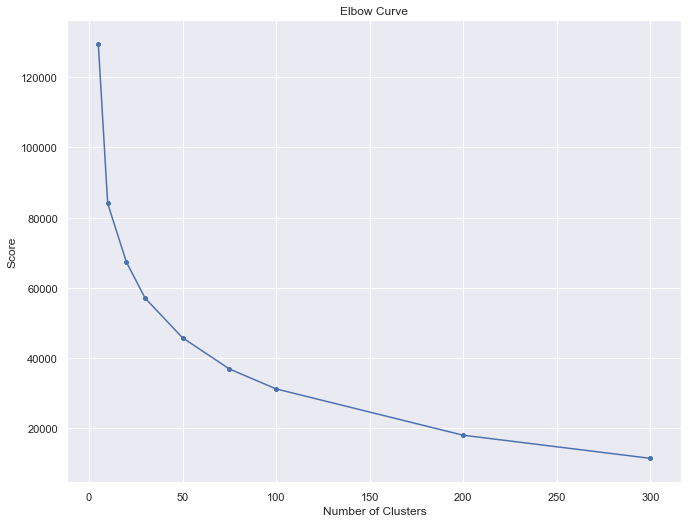

In [17]:
# se grafican los datos etiquetados con k-means

fig, ax = plt.subplots(figsize=(11, 8.5))
plt.title('Elbow Curve')
sns.lineplot(x="Number of Clusters",
             y="Score",
            data=df_Elbow)
sns.scatterplot(x="Number of Clusters",
             y="Score",
             data=df_Elbow)

Lo natural en este caso, sería considerar 10 clusters. Esto es debido a que anteriormente se setteó la data de manera que estuviese en 8, si bien el score para 5 es bastante alto, 10 es un valor más cercano y que además separa mejor la información. 

Respecto a los números mayores, se puede ver que el score va disminuyendo con una tasa similar a 1/n con n el número de clusters. Esto si bien "va mejorando" no necesariamente es así, debido a que existe el dilema del overfitting y la maldición de la dimensionalidad al ir aumentando la cantidad de n's. Son solo 36 atributos así que lo anterior está muy presente en la cantidad de n elegidos. La maldición hace que aumente exponencialmente la cantidad y esto es peligroso para fittear el modelo.